# 분산분석
<!-- 4-1 -- >


In [2]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols       # 4-1-1
from statsmodels.stats.anova import anova_lm  # 4-1-1

In [6]:
pd.options.display.float_format = '{:.4f}'.format   # 소수점 표현 setting

- poison 데이터셋 load 
- 연속형 반응변수 : survival time
- 명목형 설명변수 : treatment and poison
- 경로를 설정하고 csv file 로드 후 dataframe 확인

In [12]:
path_file = "http://ranking.uos.ac.kr/class/VIS/data/" # insert poison file path
poi = pd.read_csv(path_file + 'poison.csv')
poi.head()

,time,poison,treat
0,0.3100,G1,A
1,0.4500,G1,A
2,0.4600,G1,A
3,0.4300,G1,A
4,0.3600,G2,A


- 데이터 설명
    + three poisons and (b) four treatments. Each combination of the two factors is used for four animals. The allocation to animals is completely randomized.
    + A data frame with 48 observations on the following 3 variables.
        * poison type of poison (1, 2, or 3)
        * treatment manner of treatment (1, 2, 3, or 4)
        * time time until death (hours)
    + These data are also available from OzDASL, the Australian Data and Story Library (https://dasl.datadescription.com/). (Note: The time measurements of the data at OzDASL are in units of tens of hours.)
    
- 데이터프레임의 기본정보 확인
    + 정보: info()
    + 데이터타입: dtypes
    + 요약통계량: describle(include ='all')
    + group_by를 활용한 기초통계량 구하기

In [19]:
poi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    48 non-null     float64
 1   poison  48 non-null     object 
 2   treat   48 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.2+ KB


In [20]:
poi.dtypes

time      float64
poison     object
treat      object
dtype: object

In [21]:
poi.describe(include='all')

,time,poison,treat
count,48.0000,48,48
unique,NaN,3,4
top,NaN,G1,A
freq,NaN,16,12
mean,0.4794,NaN,NaN
std,0.2529,NaN,NaN
min,0.1800,NaN,NaN
25%,0.3000,NaN,NaN
50%,0.4000,NaN,NaN
75%,0.6225,NaN,NaN


In [31]:
poi.groupby(by=['poison', 'treat']).count()

time
poison treat      
G1     A         4
       B         4
       C         4
       D         4
G2     A         4
       B         4
       C         4
       D         4
G3     A         4
       B         4
       C         4
       D         4

In [25]:
poi.groupby(by=['poison']).mean()

,time
poison,
G1,0.6175
G2,0.5444
G3,0.2762


In [26]:
poi.groupby(by=['treat']).mean()

,time
treat,
A,0.3142
B,0.6767
C,0.3925
D,0.5342


- statsmodels.formula.api 의 ols를 이용하여 일원분산분석 모형 적합
- statsmodels.stats.anova 의 anova_lm을 이용하여 분산분석 테이블 확인
- 요인마다 제곱합(SS), 자유도(df)를 확인하고 F값과 p-value의 해석


In [10]:
one_way_anova = ols('time ~ poison', df_poi).fit()
result_oneway = anova_lm(one_way_anova)
result_oneway

,df,sum_sq,mean_sq,F,PR(>F)
poison,2.0000,1.0330,0.5165,11.7860,0.0001
Residual,45.0000,1.9721,0.0438,NaN,NaN


- 일원분산분석과 마찬가지로 ols, anova_lm을 이용하여 이원분산분석 모형 적합
- 분산분석 테이블을 이용하여 각 요인인 poison, treat에 따라서 집단간 반응변수의 평균의 차이가 있는지 확인
- poison * treat의 교호작용 확인

In [41]:
two_way_anova = ols('time ~ poison * treat', poi).fit()
result_twoway = anova_lm(two_way_anova)
result_twoway

,df,sum_sq,mean_sq,F,PR(>F)
poison,2.0000,1.0330,0.5165,23.2217,0.0000
treat,3.0000,0.9212,0.3071,13.8056,0.0000
poison:treat,6.0000,0.2501,0.0417,1.8743,0.1123
Residual,36.0000,0.8007,0.0222,NaN,NaN


- 종속변수 time의 독립변수 poison에 대한 상자그림과 산점도
- pyplot 패키지의 활용
- poison에 따른 time의 평균과 분포는 어떤 차이를 보이는가?

- poison 변수의 값을 기준으로 데이터를 나누기 위해서 값을 확인해본다.

In [34]:
poi['poison'].value_counts()

G1    16
G2    16
G3    16
Name: poison, dtype: int64

- 확인한 poison의 값을 이용하여 데이터를 나눈다. 

In [35]:
x1 = poi['time'][poi['poison']=='G1']
x2 = poi['time'][poi['poison']=='G2']
x3 = poi['time'][poi['poison']=='G3']

- 그래픽 스타일을 'ggplot'으로 바꾸자

In [36]:
plt.style.use('ggplot')

Text(0, 0.5, 'Y: time')

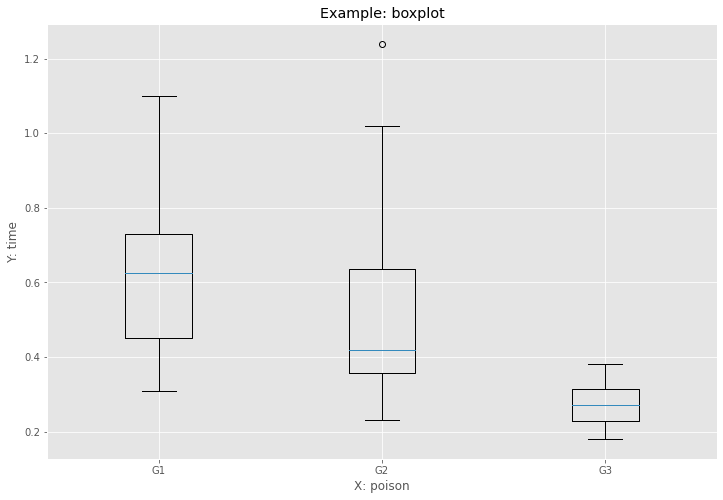

In [42]:
fig, ax = plt.subplots()
ax.boxplot([x1,x2,x3])
ax.set_xticks([1,2,3],['G1','G2','G3'])
ax.set_title('Example: boxplot')
ax.set_xlabel("X: poison")
ax.set_ylabel("Y: time")

- 분산분석을 위한 기초통계량을 계산한다
  + groupby 를 이용하여 평균과 분산을 계산한다.
  + 계산된 결과를 합쳐서 출력한다. 

In [97]:
mean = poi.groupby(['poison', 'treat'])['time'].mean()
std = poi.groupby(['poison', 'treat'])['time'].std()
mean.name = 'mean'
std.name = 'std'
summary_1 = pd.concat([mean, std], axis=1)
summary_1

mean    std
poison treat              
G1     A     0.4125 0.0695
       B     0.8800 0.1608
       C     0.5675 0.1567
       D     0.6100 0.1128
G2     A     0.3200 0.0753
       B     0.8150 0.3363
       C     0.3750 0.0569
       D     0.6675 0.2710
G3     A     0.2100 0.0216
       B     0.3350 0.0465
       C     0.2350 0.0129
       D     0.3250 0.0265

- agg 함수를 이용하면 간단한 표현이 가능하다.

In [99]:
summary_2 = poi.groupby(['poison', 'treat'])['time'].agg(['mean', 'std']).round(4)
summary_2

mean    std
poison treat              
G1     A     0.4125 0.0695
       B     0.8800 0.1608
       C     0.5675 0.1567
       D     0.6100 0.1128
G2     A     0.3200 0.0753
       B     0.8150 0.3363
       C     0.3750 0.0569
       D     0.6675 0.2710
G3     A     0.2100 0.0216
       B     0.3350 0.0465
       C     0.2350 0.0129
       D     0.3250 0.0265

In [103]:
tmp=summary_2['mean'].reset_index()
tmp['poison'].unique()

array(['G1', 'G2', 'G3'], dtype=object)

In [ ]:
xaxis_poison = np.concatenate([np.ones(4), np.ones(4)*2, np.ones(4)*3])
plt.scatter(xaxis_poison, df_summary_2.loc['mean'].to_numpy())
plt.xlabel('poison')
plt.ylabel('survival time')
plt.show()

- 위에서 적합해 놓은 one_way_anova에 anova 분석에서 residual 이 저장되어 있다. sklearn의 statmodel.qqplot() 함수를 이용하여 Q-Q plot을 그려보자.
- Q-Q 플롯은 표준정규분포의 이론적 분위수와 관측치의 분위수 값을 비교하여 분포의 꼬리의 두께, 분포의 대칭성등을 파악할 수 있는 시각화 도구다. 
    + y축: 표준화된 잔차
    + x축: (데이터의 분위수에 대응되는) 표준정규분포의 Z-value 

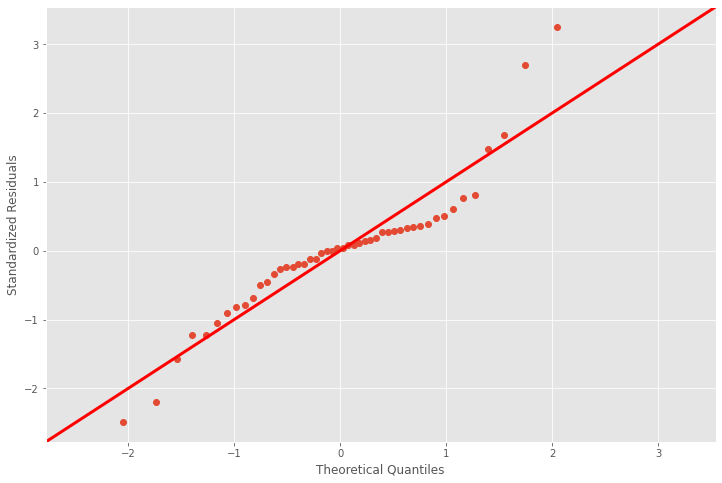

In [76]:
res = np.array(two_way_anova.resid)
std_res = res/two_way_anova.resid.std()
sm.qqplot(std_res, line='45')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

- time 변수를 1/time으로 분석하면 residual 에 대한 우리의 가정을 좀 더 신뢰할 수 있음.

In [81]:
poi["time_inv"] = 1/poi['time']

5.555555555555555

In [85]:
two_way_anova_c = ols('time_inv ~ poison * treat', poi).fit()

In [83]:
result_twoway = anova_lm(two_way_anova_c)
result_twoway

,df,sum_sq,mean_sq,F,PR(>F)
poison,2.0000,34.8771,17.4386,72.6347,0.0000
treat,3.0000,20.4143,6.8048,28.3431,0.0000
poison:treat,6.0000,1.5708,0.2618,1.0904,0.3867
Residual,36.0000,8.6431,0.2401,NaN,NaN


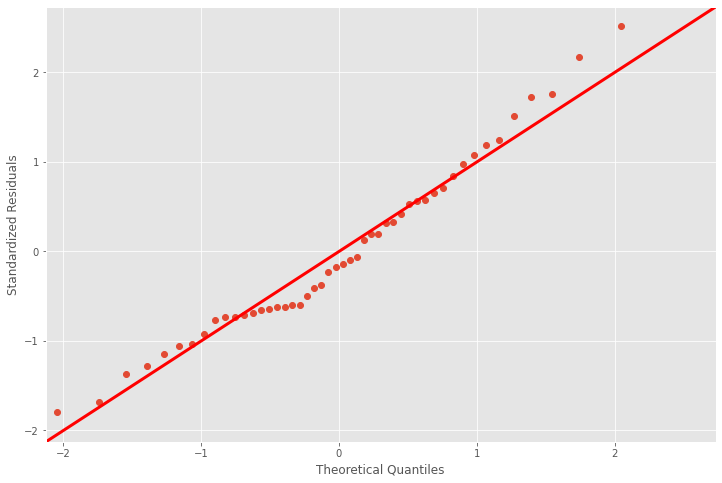

In [89]:
res = np.array(two_way_anova_c.resid)
std_res = res/two_way_anova_c.resid.std()
sm.qqplot(std_res, line='45')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

- 잔차의 히스토그램 그리기

Text(0, 0.5, 'Frequency')

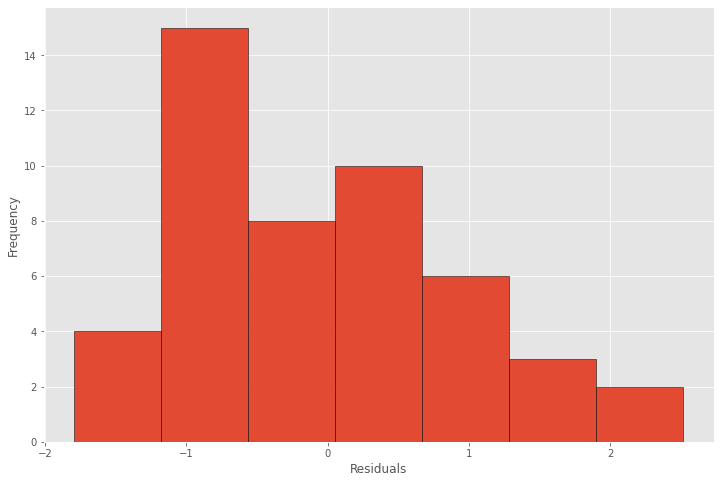

In [95]:
fig, ax = plt.subplots()
ax.hist(std_res, bins='auto', histtype='bar', ec='k') 
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')